<a href="https://colab.research.google.com/github/natgoodrich371/Goodrich_N_CS4200_Assignment_2/blob/main/Covid_Case_Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-covid-case-kaggle3/us_covid_case_kaggle3.csv
/kaggle/input/us-covid-case/us_covid_case.csv
/kaggle/input/us-covid-case-kaggle2/us_covid_case_kaggle.csv
/kaggle/input/us-covid-case-kaggle/us_covid_case_kaggle.csv


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = '../input/us-covid-case-kaggle3/us_covid_case_kaggle3.csv'

df = pd.read_csv(data, header=None)

In [ ]:
df.shape

(332, 6)

In [ ]:
df.head()

,0,1,2,3,4,5
0,5,1.0,3,0.12,8.3,1
1,5,1.0,4,0.12,8.4,1
2,5,1.0,5,0.12,8.2,1
3,5,1.0,5,0.12,8.1,1
4,5,1.0,5,0.12,8.1,1


In [ ]:
col_names = ['new_cases', 'rep_rate', 'new_tests', 'pos_rate', 'tests_per_case', 'new_vac']

df.columns = col_names

col_names

['new_cases', 'rep_rate', 'new_tests', 'pos_rate', 'tests_per_case', 'new_vac']

In [ ]:
df.head()

,new_cases,rep_rate,new_tests,pos_rate,tests_per_case,new_vac
0,5,1.0,3,0.12,8.3,1
1,5,1.0,4,0.12,8.4,1
2,5,1.0,5,0.12,8.2,1
3,5,1.0,5,0.12,8.1,1
4,5,1.0,5,0.12,8.1,1


In [ ]:
df['new_cases'] = df['new_cases'].astype(str)
df['rep_rate'] = df['rep_rate'].astype(float)
df['new_tests'] = df['new_tests'].astype(int)
df['pos_rate'] = df['pos_rate'].astype(float)
df['tests_per_case'] = df['tests_per_case'].astype(float)
df['new_vac'] = df['new_vac'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   new_cases       332 non-null    object 
 1   rep_rate        332 non-null    float64
 2   new_tests       332 non-null    int64  
 3   pos_rate        332 non-null    float64
 4   tests_per_case  332 non-null    float64
 5   new_vac         332 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 15.7+ KB


In [ ]:
col_names = ['new_cases', 'rep_rate', 'new_tests', 'pos_rate', 'tests_per_case', 'new_vac']

for col in col_names:
    
    print(df[col].value_counts())   

1    116
2    101
5     40
3     40
4     35
Name: new_cases, dtype: int64
0.8    96
0.9    69
1.0    67
0.7    35
1.1    22
1.4    16
1.5    12
1.2     8
1.3     7
Name: rep_rate, dtype: int64
2    100
3     98
4     95
5     21
1     18
Name: new_tests, dtype: int64
0.05    72
0.04    42
0.02    36
0.10    32
0.09    24
0.07    22
0.06    21
0.03    20
0.12    16
0.08    14
0.01    10
0.13     9
0.11     8
0.14     6
Name: pos_rate, dtype: int64
18.8    7
9.6     6
8.2     6
18.4    6
18.6    6
       ..
25.3    1
24.9    1
24.3    1
23.8    1
17.7    1
Name: tests_per_case, Length: 189, dtype: int64
2    122
1     54
3     54
4     28
5     28
7     19
8     14
6     13
Name: new_vac, dtype: int64


In [ ]:
df['new_cases'].value_counts()

1    116
2    101
5     40
3     40
4     35
Name: new_cases, dtype: int64

In [ ]:
df.isnull().sum()

new_cases         0
rep_rate          0
new_tests         0
pos_rate          0
tests_per_case    0
new_vac           0
dtype: int64

In [ ]:
X = df.drop(['new_cases'], axis=1)
y = df['new_cases']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((222, 5), (110, 5))

In [ ]:
X_train.dtypes

rep_rate          float64
new_tests           int64
pos_rate          float64
tests_per_case    float64
new_vac             int64
dtype: object

In [ ]:
X_train.head()

,rep_rate,new_tests,pos_rate,tests_per_case,new_vac
39,0.8,4,0.10,9.4,4
250,1.1,3,0.10,9.3,2
104,1.0,2,0.05,19.4,3
155,0.7,3,0.03,31.4,5
314,0.9,2,0.05,19.9,1


In [ ]:
# import category encoders

import category_encoders as ce

In [ ]:
encoder = ce.OrdinalEncoder(cols=['rep_rate', 'new_tests', 'pos_rate', 'tests_per_case', 'new_vac'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,rep_rate,new_tests,pos_rate,tests_per_case,new_vac
39,1,1,1,1,1
250,2,2,1,2,2
104,3,3,2,3,3
155,4,2,3,4,4
314,5,3,2,5,5


In [ ]:
X_test.head()

,rep_rate,new_tests,pos_rate,tests_per_case,new_vac
25,2,5,10,-1.0,3
317,5,1,2,136.0,1
73,1,1,2,49.0,6
193,3,3,4,-1.0,2
57,4,1,12,115.0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5909


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['4', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2', '1', '2',
       '1', '2', '1', '2', '2', '1', '1', '1', '1', '2', '1', '5', '4',
       '1', '2', '1', '2', '1', '1', '2', '3', '1', '3', '1', '4', '1',
       '1', '1', '3', '2', '4', '4', '3', '1', '2', '1', '1', '2', '1',
       '1', '1', '1', '1', '1', '1', '5', '2', '1', '4', '2', '4', '3',
       '2', '2', '5', '1', '1', '2', '1', '1', '1', '3', '4', '1', '2',
       '1', '2', '1', '1', '1', '5', '2', '3', '1', '1', '1', '1', '1',
       '3', '2', '3', '1', '1', '2', '1', '2', '1', '1', '2', '3', '2',
       '2', '1', '2', '3', '2', '3', '2', '1', '1', '1', '1', '1', '1',
       '1', '3', '4', '2', '1', '2', '1', '4', '2', '1', '1', '3', '2',
       '4', '1', '2', '5', '2', '5', '4', '1', '4', '3', '4', '1', '1',
       '1', '2', '3', '2', '3', '2', '2', '1', '4', '3', '1', '1', '3',
       '1', '1', '1', '3', '1', '3', '3', '4', '1', '1', '3', '1', '1',
       '2', '2', '3', '3', '2', '2', '1', '2', '3', '1', '3', '1

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7117


In [ ]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7117
Test set score: 0.5909


[Text(764.46, 797.28, 'X[1] <= 2.5\ngini = 0.741\nsamples = 222\nvalue = [81, 65, 29, 21, 26]'),
 Text(435.24, 652.3199999999999, 'X[4] <= 5.5\ngini = 0.736\nsamples = 129\nvalue = [18, 54, 25, 14, 18]'),
 Text(245.52, 507.35999999999996, 'X[4] <= 1.5\ngini = 0.789\nsamples = 100\nvalue = [17, 26, 25, 14, 18]'),
 Text(133.92000000000002, 362.4, 'X[0] <= 2.0\ngini = 0.403\nsamples = 12\nvalue = [0, 9, 2, 1, 0]'),
 Text(89.28, 217.43999999999994, 'X[3] <= 15.0\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 2, 1, 0]'),
 Text(44.64, 72.4799999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(133.92000000000002, 72.4799999999999, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2, 0, 0]'),
 Text(178.56, 217.43999999999994, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0, 0]'),
 Text(357.12, 362.4, 'X[1] <= 1.5\ngini = 0.793\nsamples = 88\nvalue = [17, 17, 23, 13, 18]'),
 Text(267.84000000000003, 217.43999999999994, 'X[2] <= 1.5\ngini = 0.732\nsamples = 37\nvalue = [0, 6, 13, 9, 9]'),
 

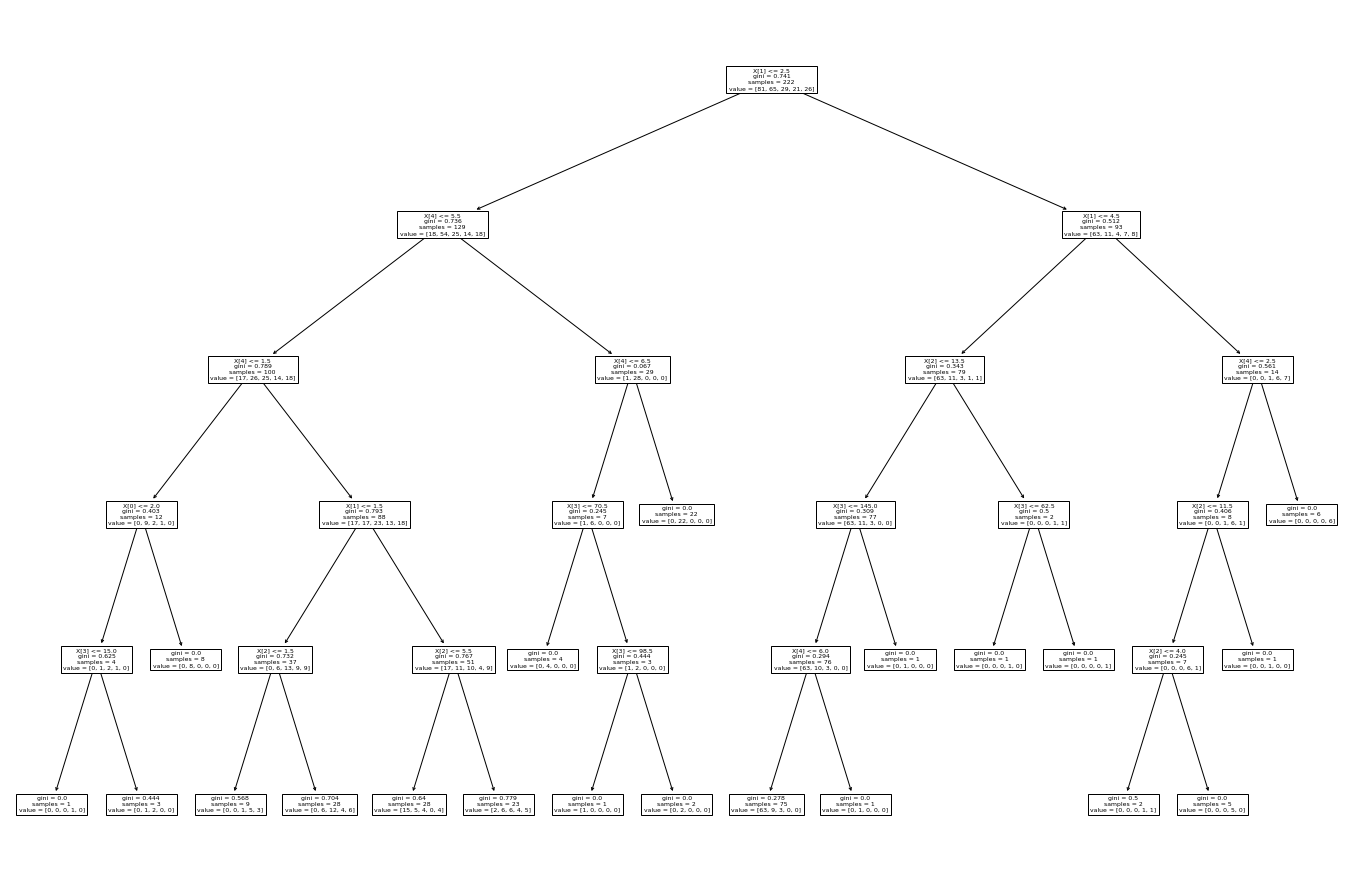

In [ ]:
plt.figure(figsize=(24,16))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6455


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['3', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '2',
       '1', '2', '1', '2', '2', '1', '1', '1', '1', '2', '1', '5', '4',
       '1', '1', '1', '2', '1', '1', '2', '3', '1', '3', '1', '5', '1',
       '1', '1', '5', '2', '4', '4', '5', '1', '2', '1', '1', '2', '1',
       '1', '1', '1', '1', '1', '1', '5', '2', '1', '4', '2', '5', '3',
       '2', '2', '5', '1', '1', '2', '1', '1', '1', '3', '4', '1', '1',
       '1', '2', '1', '1', '1', '4', '2', '5', '1', '1', '1', '1', '1',
       '3', '2', '2', '1', '1', '2', '1', '2', '1', '1', '2', '5', '2',
       '2', '1', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1',
       '1', '3', '4', '2', '1', '2', '1', '4', '2', '1', '1', '2', '2',
       '4', '1', '2', '5', '2', '5', '4', '1', '4', '5', '5', '1', '1',
       '1', '2', '2', '2', '5', '1', '2', '1', '4', '2', '1', '1', '3',
       '1', '1', '1', '2', '1', '2', '2', '4', '1', '1', '3', '1', '1',
       '2', '2', '5', '5', '2', '2', '1', '2', '5', '1', '5', '1

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7117


In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7117
Test set score: 0.6455


[Text(912.0413793103448, 797.28, 'X[4] <= 5.5\nentropy = 2.117\nsamples = 222\nvalue = [81, 65, 29, 21, 26]'),
 Text(577.2413793103448, 652.3199999999999, 'X[1] <= 1.5\nentropy = 2.131\nsamples = 192\nvalue = [80, 36, 29, 21, 26]'),
 Text(253.98620689655172, 507.35999999999996, 'X[2] <= 1.5\nentropy = 1.972\nsamples = 45\nvalue = [0, 11, 15, 10, 9]'),
 Text(138.53793103448277, 362.4, 'X[3] <= 35.0\nentropy = 1.435\nsamples = 11\nvalue = [0, 0, 2, 6, 3]'),
 Text(92.35862068965517, 217.43999999999994, 'X[0] <= 1.5\nentropy = 1.459\nsamples = 6\nvalue = [0, 0, 2, 1, 3]'),
 Text(46.179310344827584, 72.4799999999999, 'entropy = 1.0\nsamples = 2\nvalue = [0, 0, 1, 1, 0]'),
 Text(138.53793103448277, 72.4799999999999, 'entropy = 0.811\nsamples = 4\nvalue = [0, 0, 1, 0, 3]'),
 Text(184.71724137931034, 217.43999999999994, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0]'),
 Text(369.4344827586207, 362.4, 'X[2] <= 5.5\nentropy = 1.862\nsamples = 34\nvalue = [0, 11, 13, 4, 6]'),
 Text(277.0758

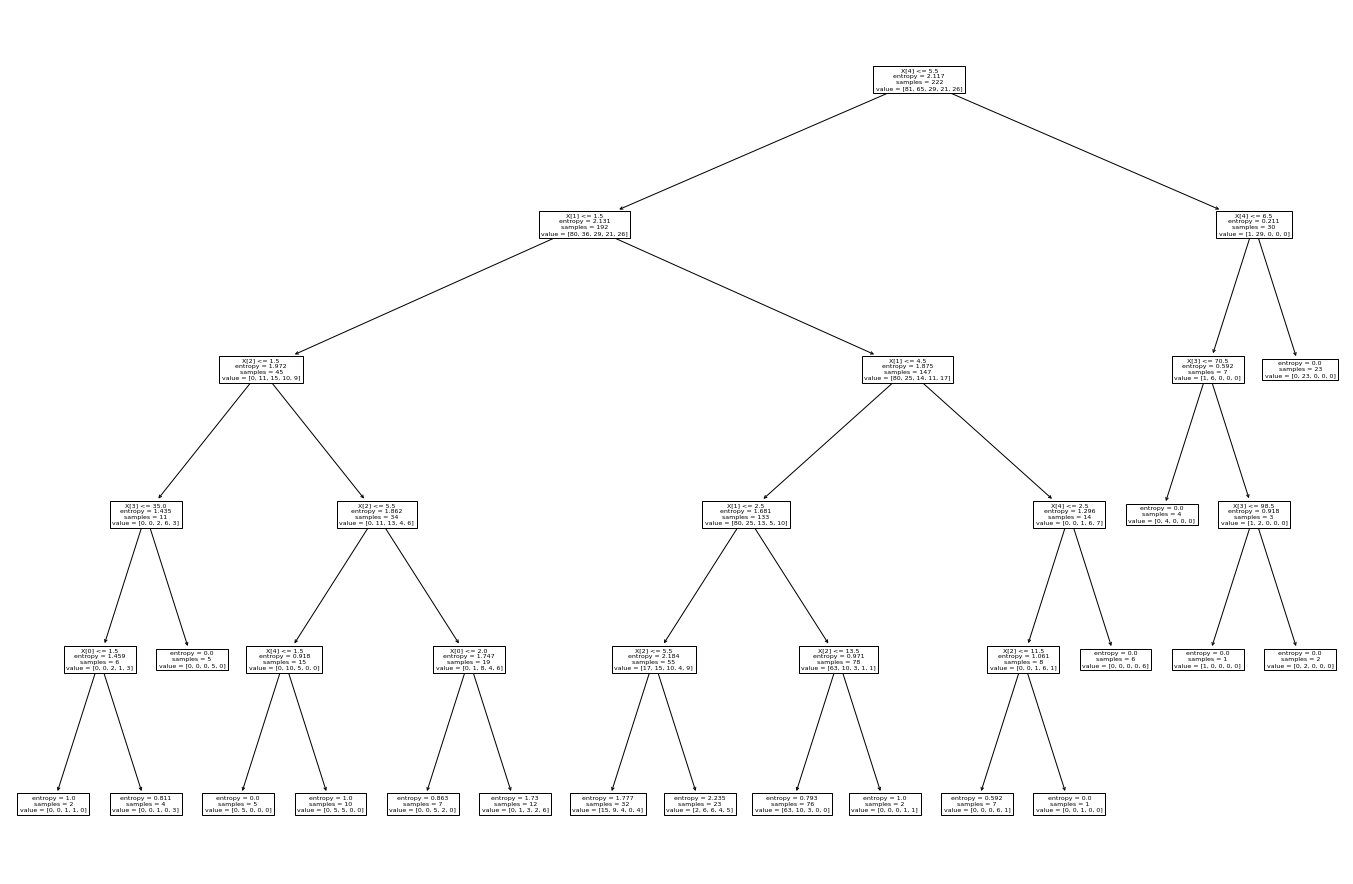

In [ ]:
plt.figure(figsize=(24,16))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 